## Qualitative_Bankruptcy

**Requirements**
- data: 'Qualitative_Bankruptcy.data.csv'
- Libraries: pandas, numpy, sklearn, lightgbm
- Visaualization libraries : matplotlib.pyplot, seaborn

In [286]:
# importing libraries in python

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import lightgbm as lgb
from sklearn import metrics
import statsmodels.api as sm

pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

## DATA ANALYSIS

In [228]:
# Loading the dataset
df = pd.read_csv('Qualitative_Bankruptcy.data.csv')

In [229]:
# Printing first 5 rows of the data
df.head()

,IR,MR,FF,CR,CO,OP,class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


**Features:**
- IR : Industrial Risk
- MR : Management Risk
- FF : Financial Flexibility
- CR : Credibility
- CO : Competitiveness
- OP : Operating Risk
- class : label={B,NB}
- B: Bankruptcy    NB: Non-Bankruptcy

**Value of the features:**  P : positive, A : Average, N : Negative

In [230]:
# Number of records(rows) and columns
df.shape

(250, 7)

In [231]:
# Getting the informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IR      250 non-null    object
 1   MR      250 non-null    object
 2   FF      250 non-null    object
 3   CR      250 non-null    object
 4   CO      250 non-null    object
 5   OP      250 non-null    object
 6   class   250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='class', ylabel='count'>

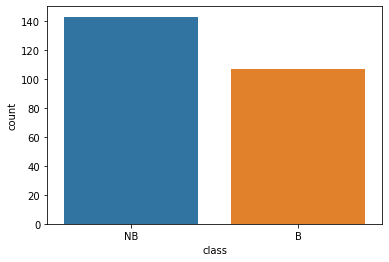

In [232]:
# check if the data os balanced or imbalanced
sns.countplot(df['class'], label = "Count")

In [233]:
# check if the data os balanced or imbalanced
df_class_B = df[df['class']=='B'].value_counts().sum()
df_class_NB = df[df['class']=='NB'].value_counts().sum()
perc_class_B = df_class_B/(df_class_B+df_class_NB)
perc_class_NB = df_class_NB/(df_class_B+df_class_NB)
print('{:.2f}%'.format(perc_class_B*100), 'of the dataset is considered class = B' )
print('{:.2f}%'.format(perc_class_NB*100), 'of the dataset is considered class = NB' )

42.80% of the dataset is considered class = B
57.20% of the dataset is considered class = NB


**** Understanding dataset:
1. Our dataset has 7 columns which includes 6 features and one label/target ('class')
2. Number of Instances/rows/records : 250
3. As we can see almost 43% of the data is considered class = B and 57% is considered class = NB. We can say that our classes are slightly imbalanced.

## DATA PREPROCESSING

In [234]:
# Check if there is any NAN_value in the data
df.isnull().sum()

IR       0
MR       0
FF       0
CR       0
CO       0
OP       0
class    0
dtype: int64

In [235]:
# Splitting the data into features(x) and label(y)
x=df.drop('class',axis='columns')
y=df['class']

In [236]:
# We don't have any nan-value or missing_value in our data :)

**Feature encoding for categorical column**
- The conventional way of performing encoding for categorical variable is using one hot encoding. For our case, since the dataset is quite small with few fearure columns, using onehot encoding would not lead to memory and computation overhead.
- Another possibility is to use label encoder since positive, average and negative values have an inherent order in it under the risk perspective (negative < average < positive).
- Therefore, in this section we will perform a quick analysis and comparison between these two encodings. We specifically use, logistic regression and KNN classifiers to identify the differences.
- **one_hot_encoding:** represents the categorical data in the form of binary vectors. Becasue we have only 6 categorical features and it doesn't add too many features to the dataset we can use it.
- **label-encoding:** replace the categorical value with a numeric value between 0 and the number of classes minus 1. Advantage of the label Encoding is we don't add more features to the data.


**label-encoding**

In [237]:
y_df = pd.DataFrame(y)
y_df.head()

,class
0,NB
1,NB
2,NB
3,NB
4,NB


In [238]:
# Applying label encoding on all the features 
le = preprocessing.LabelEncoder()
x_le = x.apply(le.fit_transform)
x_le.head()

,IR,MR,FF,CR,CO,OP
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [239]:
le = preprocessing.LabelEncoder()
y_le = y_df.apply(le.fit_transform)
y_le.head()

,class
0,1
1,1
2,1
3,1
4,1


- class = 1 : 'NB'
- class = 0 : B'

**one_hot_encoding**

In [240]:
ohe=OneHotEncoder(handle_unknown="ignore",sparse=False)
x_ohe = pd.DataFrame (ohe.fit_transform(x))
x_ohe.columns = ohe.get_feature_names(x.columns)

In [241]:
x_ohe.head()

,IR_A,IR_N,IR_P,MR_A,MR_N,MR_P,FF_A,FF_N,FF_P,CR_A,CR_N,CR_P,CO_A,CO_N,CO_P,OP_A,OP_N,OP_P
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [242]:
# In this data we don't have any outlier. Our features' type are object includes {P,A,N}

In [243]:
# Train-test split
x_train_ohe,x_test_ohe, y_train, y_test = train_test_split(x_ohe,y, test_size=0.2,random_state=42)
x_train_le,x_test_le, y_train_le, y_test_le = train_test_split(x_le,y_le, test_size=0.2,random_state=42)

**Train model with Logistik Regression**

In [244]:
lgreg = LogisticRegression(random_state = 42)
lgreg.fit(x_ohe_train, y_train)

LogisticRegression(random_state=42)

In [245]:
predict_test_ohe = lgreg.predict(x_ohe_test)
predict_train_ohe = lgreg.predict(x_ohe_train)
acc_test_ohe = accuracy_score(y_test, predict_test_ohe)
acc_train_ohe = accuracy_score(y_train, predict_train_ohe)
print('accuracy of the logistik regreesion on the test data with one_hot_encoding',acc_test_ohe)
print('accuracy of the logistik regreesion on the train data with one_hot_encoding',acc_train_ohe)

accuracy of the logistik regreesion on the test data with one_hot_encoding 1.0
accuracy of the logistik regreesion on the train data with one_hot_encoding 1.0


In [246]:
lgreg = LogisticRegression(random_state = 42)
lgreg.fit(x_le_train, y_train_le)

LogisticRegression(random_state=42)

In [247]:
predict_test_le = lgreg.predict(x_le_test)
predict_train_le = lgreg.predict(x_le_train)
acc_test_le = accuracy_score(y_test_le, predict_test_le)
acc_train_le = accuracy_score(y_train_le, predict_train_le)
print('accuracy of the logistik regreesion on the test data with label encoder',acc_test_le)
print('accuracy of the logistik regreesion on the train data with label encoder',acc_train_le)

accuracy of the logistik regreesion on the test data with label encoder 0.62
accuracy of the logistik regreesion on the train data with label encoder 0.54


**Train model with Logistik Regression**

In [248]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_ohe_train, y_train)

KNeighborsClassifier()

In [249]:
predict_test_ohe = knn.predict(x_ohe_test)
predict_train_ohe = knn.predict(x_ohe_train)
acc_test_ohe = accuracy_score(y_test, predict_test_ohe)
acc_train_ohe = accuracy_score(y_train, predict_train_ohe)
print('accuracy of the KNN on the test data with one_hot_encoding',acc_test_ohe)
print('accuracy of the KNN on the train data with one_hot_encoding',acc_train_ohe)

accuracy of the KNN on the test data with one_hot_encoding 1.0
accuracy of the KNN on the train data with one_hot_encoding 0.995


In [250]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_le_train, y_train_le)

KNeighborsClassifier()

In [251]:
predict_test_le = knn.predict(x_le_test)
predict_train_le = knn.predict(x_le_train)
acc_test_le = accuracy_score(y_test_le, predict_test_le)
acc_train_le = accuracy_score(y_train_le, predict_train_le)
print('accuracy of the KNN on the test data with label encoder',acc_test_le)
print('ccuracy of the KNN on the train data with label encode',acc_train_le)

accuracy of the KNN on the test data with label encoder 0.98
ccuracy of the KNN on the train data with label encode 0.99


- we could see that one hot encoding performs slightly higher than label encoder, however we do see that the classifiers trained on onehot may be overfitting on the training data more than the label encoder.
- One reason behind this, is the limitation of one hot encoding, which is multicollinearity. For this let us do a quick analysis using Variance in Factor to identify this on the encoded onehot features

In [252]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

#Variance in Factor for one_hot_encoding
calculate_vif(x_ohe)

,Var,Vif
0,IR_A,inf
1,IR_N,inf
16,OP_N,inf
15,OP_A,inf
14,CO_P,inf
13,CO_N,inf
12,CO_A,inf
11,CR_P,inf
10,CR_N,inf
9,CR_A,inf


In [253]:
#Variance in Factor for label encoding
calculate_vif(x_le)

,Var,Vif
5,OP,3.14
4,CO,2.84
1,MR,2.69
0,IR,2.52
2,FF,2.42
3,CR,2.34


- Multicolinearity create more problems in a regression setting but it can affect classification too especially in terms of interpretability.   
- Multi-colinearity is not useful for logistic regression cause this model requires there to be a little or no multicollinearity among the independent variables (from the assumptions of logistic regression). That is why we see that our model trained on one-hot encoding seems to overfit on the training data. This might lead to poor generalization.  In addition, under decision tree classifiers, with multicollinear features, the model becomes unreliable. Indeed, if feature importance is performed, the tree chooses any of the collinear features to create split and hence the importance of a feature is then divided.  If a permutation approach is chosen, any of the collinear features will be permuted leading to misleading results. 
- After calculating the VIF factors on both Label encoded features and one-hot encoded, the label encoded ones show moderate collinearity when compared to the one-hot encoded features. 

## Model Training
Since our problem is a binary classification we choose these models to train our model then  we evaluate our models and choose the best one.

1. KNN
2. SVM
3. LightGBM
3. GradientBoosting

- we will apply all these machine learning models on our data with both label encoding and one_hot_encoding

We Evaluate the models based on these performance metrics:

- Accuracy: describes the number of correct predictions over all predictions
- Precision: is a measure of how many of the positive predictions made are correct (true positives)
- Recall: is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data
- F1_score: is a measure combining both precision and recall.
- note: F1_score ranges from 0 to 1, where 0 is the worst possible score and 1 is a perfect score indicating that the model predicts each observation correctly
- note: Since our data is slightly imbalanced aside accuracy we need to calculate precision, recall and F1_score

## Model trainig with labelencoding on features and label

In [255]:
# Train-test split for data with label encoding
x_train_le,x_test_le, y_train, y_test = train_test_split(x_le,y_le,test_size=0.2,random_state=42)

In [256]:
# Feature Scaling 
# The concept of scaling the data is that The dataset may combine features from different dimensions and scales,
# which may have an impact on how a model is trained. Therefore outcomes from a model that was trained with unscaled 
# data may be biased.
# we've used standardization (StandardScaler) for scaling our data

# standardisation for features
ssc = StandardScaler()
ssc.fit(x_train_le)
x_train = pd.DataFrame(ssc.transform(x_train_le), columns=x_train_le.columns)
x_test = pd.DataFrame(ssc.transform(x_test_le), columns=x_test_le.columns)

**1. k-nearest neighbors** 
- The k-nearest neighbors (KNN) is a supervised classification machin learning method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

In [257]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

**cross_validation**

In [258]:
acc_knn = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of KNN model with 5-fold cross validation is',acc_knn.mean())

Mean accuracy of KNN model with 5-fold cross validation is 0.93


**Model Evaluation**

In [259]:
predict_test_knn = knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, predict_test_knn)
auc_knn = roc_auc_score(y_test, predict_test_knn)
precision_test_knn = precision_score(y_test, predict_test_knn)
recall_test_knn = recall_score(y_test, predict_test_knn)
f1_test_knn = f1_score(y_test, predict_test_knn)
results_test = pd.DataFrame([['KNN',acc_test_knn, acc_knn.mean(),precision_test_knn ,recall_test_knn, f1_test_knn, auc_knn]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,0.96,0.93,1.0,0.931034,0.964286,0.965517


**2. Support Vector Machine**
- SVM is a supervised classification machine learning algorithm that aims to find an optimal boundary between the possible outputs.

In [260]:
svm = SVC(kernel='linear') 
svm.fit(x_train, y_train)

SVC(kernel='linear')

**Cross Validation**

In [261]:
acc_svm = cross_val_score(estimator = svm, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of SVM model with 5-fold cross validation is',acc_svm.mean())

Mean accuracy of SVM model with 5-fold cross validation is 0.575


**Model Evaluation**

In [262]:
predict_test_svm = svm.predict(x_test)
acc_test_svm = accuracy_score(y_test, predict_test_svm)
auc_svm = roc_auc_score(y_test, predict_test_svm)
precision_test_svm = precision_score(y_test, predict_test_svm)
recall_test_svm = recall_score(y_test, predict_test_svm)
f1_test_svm = f1_score(y_test, predict_test_svm)

model_results = pd.DataFrame([['SVM',acc_test_svm, acc_svm.mean(),precision_test_svm ,recall_test_svm, f1_test_svm, auc_svm]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,0.96,0.930,1.000000,0.931034,0.964286,0.965517
1,SVM,0.64,0.575,0.677419,0.724138,0.700000,0.623974


**3. LightGBM**
- LightGBM is a gradient boosting framework that uses tree based learning algorithm.
- LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. It means that LightGBM 
grows tree leaf-wise while other algorithms grow level-wise

In [263]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

**Cross Validation**

In [264]:
acc_lgbm = cross_val_score(estimator = lgbm, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of LightGBMClassifier model with 5-fold cross validation is',acc_lgbm.mean())

Mean accuracy of LightGBMClassifier model with 5-fold cross validation is 1.0


**Model Evaluation**

In [265]:
predict_test_lgbm = lgbm.predict(x_test)
acc_test_lgbm = accuracy_score(y_test, predict_test_lgbm)
auc_lgbm = roc_auc_score(y_test, predict_test_lgbm)
precision_test_lgbm = precision_score(y_test, predict_test_lgbm)
recall_test_lgbm = recall_score(y_test, predict_test_lgbm)
f1_test_lgbm = f1_score(y_test, predict_test_lgbm)

model_results = pd.DataFrame([['LightGBM',acc_test_lgbm, acc_lgbm.mean(),precision_test_lgbm ,recall_test_lgbm, f1_test_lgbm, auc_lgbm]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,0.96,0.930,1.000000,0.931034,0.964286,0.965517
1,SVM,0.64,0.575,0.677419,0.724138,0.700000,0.623974
2,LightGBM,1.00,1.000,1.000000,1.000000,1.000000,1.000000


**4. GradientBoostingClassifier**
- is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function. Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.

In [266]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)

GradientBoostingClassifier()

**Cross_Validation**

In [267]:
acc_xgb = cross_val_score(estimator = xgb, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of GradientBoosting model with 5-fold cross validation is',acc_xgb.mean())

Mean accuracy of GradientBoosting model with 5-fold cross validation is 1.0


In [268]:
predict_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, predict_test_xgb)
auc_xgb = roc_auc_score(y_test, predict_test_xgb)
precision_test_xgb= precision_score(y_test, predict_test_xgb)
recall_test_xgb = recall_score(y_test, predict_test_xgb)
f1_test_xgb = f1_score(y_test, predict_test_xgb)

model_results = pd.DataFrame([['GradientBoosting',acc_test_xgb, acc_xgb.mean(),precision_test_xgb ,recall_test_xgb, f1_test_xgb, auc_xgb]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,0.96,0.930,1.000000,0.931034,0.964286,0.965517
1,SVM,0.64,0.575,0.677419,0.724138,0.700000,0.623974
2,LightGBM,1.00,1.000,1.000000,1.000000,1.000000,1.000000
3,GradientBoosting,1.00,1.000,1.000000,1.000000,1.000000,1.000000


**Result for ML models on the data encoded by label encoding:**
1. As we can see from the table all of the models perfoms good except SVM. 
2. LightGBM	and GradientBoosting have highest performance metrics.
3. AUC which is Area Under the ROC Curve for the GradientBoosting and LightGBM are the highest.As we know the higher AUC the better the classifier performs. 
4. We can conclude that our models trained the data very good.

## Model trainig with one_hot_encoder on features and labelencoder on label

In [269]:
le = preprocessing.LabelEncoder()
y_le = y_df.apply(le.fit_transform)
y_le.head()

,class
0,1
1,1
2,1
3,1
4,1


In [270]:
# Train-test split for data with one_hot_encoding
x_train,x_test, y_train, y_test = train_test_split(x_ohe,y_le, test_size=0.2,random_state=42)

**1. k-nearest neighbors** 
- The k-nearest neighbors (KNN) is a supervised classification machin learning method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

In [271]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

**Cross_Validation**

In [272]:
acc_knn = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of KNN model with 5-fold cross validation is',acc_knn.mean())

Mean accuracy of KNN model with 5-fold cross validation is 0.9949999999999999


In [273]:
predict_test_knn = knn.predict(x_test)
acc_test_knn = accuracy_score(y_test, predict_test_knn)
auc_knn = roc_auc_score(y_test, predict_test_knn)
precision_test_knn = precision_score(y_test, predict_test_knn)
recall_test_knn = recall_score(y_test, predict_test_knn)
f1_test_knn = f1_score(y_test, predict_test_knn)
results_test = pd.DataFrame([['KNN',acc_test_knn, acc_knn.mean(),precision_test_knn ,recall_test_knn, f1_test_knn, auc_knn]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,1.0,0.995,1.0,1.0,1.0,1.0


**2. Support Vector Machine**
- SVM is a supervised classification machine learning algorithm that aims to find an optimal boundary between the possible outputs.

In [274]:
svm = SVC(kernel='linear') 
svm.fit(x_train, y_train)

SVC(kernel='linear')

**Cross Validation**

In [275]:
acc_svm = cross_val_score(estimator = svm, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of SVM model with 5-fold cross validation is',acc_svm.mean())

Mean accuracy of SVM model with 5-fold cross validation is 0.9949999999999999


**Model_evaluation**

In [276]:
predict_test_svm = svm.predict(x_test)
acc_test_svm = accuracy_score(y_test, predict_test_svm)
auc_svm = roc_auc_score(y_test, predict_test_svm)
precision_test_svm = precision_score(y_test, predict_test_svm)
recall_test_svm = recall_score(y_test, predict_test_svm)
f1_test_svm = f1_score(y_test, predict_test_svm)

model_results = pd.DataFrame([['SVM',acc_test_svm, acc_svm.mean(),precision_test_svm ,recall_test_svm, f1_test_svm, auc_svm]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,1.0,0.995,1.0,1.0,1.0,1.0
1,SVM,1.0,0.995,1.0,1.0,1.0,1.0


**3. LightGBM**
- LightGBM is a gradient boosting framework that uses tree based learning algorithm.
- LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. It means that LightGBM 
grows tree leaf-wise while other algorithms grow level-wise

In [277]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

**Cross validation**

In [278]:
acc_lgbm = cross_val_score(estimator = lgbm, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of LightGBMClassifier model with 5-fold cross validation is',acc_lgbm.mean())

Mean accuracy of LightGBMClassifier model with 5-fold cross validation is 1.0


**Model Evaluation**

In [279]:
predict_test_lgbm = lgbm.predict(x_test)
acc_test_lgbm = accuracy_score(y_test, predict_test_lgbm)
auc_lgbm = roc_auc_score(y_test, predict_test_lgbm)
precision_test_lgbm = precision_score(y_test, predict_test_lgbm)
recall_test_lgbm = recall_score(y_test, predict_test_lgbm)
f1_test_lgbm = f1_score(y_test, predict_test_lgbm)

model_results = pd.DataFrame([['LightGBM',acc_test_lgbm, acc_lgbm.mean(),precision_test_lgbm ,recall_test_lgbm, f1_test_lgbm, auc_lgbm]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,1.0,0.995,1.0,1.0,1.0,1.0
1,SVM,1.0,0.995,1.0,1.0,1.0,1.0
2,LightGBM,1.0,1.000,1.0,1.0,1.0,1.0


**4. GradientBoostingClassifier**
- is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function. Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.

In [280]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)

GradientBoostingClassifier()

**Cross Validation**

In [281]:
acc_xgb = cross_val_score(estimator = xgb, X = x_train, y = y_train, cv = kfold, scoring=scoring)
print('Mean accuracy of GradientBoosting model with 5-fold cross validation is',acc_xgb.mean())

Mean accuracy of GradientBoosting model with 5-fold cross validation is 0.9949999999999999


**Model Evaluation**

In [282]:
predict_test_xgb = xgb.predict(x_test)
acc_test_xgb = accuracy_score(y_test, predict_test_xgb)
auc_xgb = roc_auc_score(y_test, predict_test_xgb)
precision_test_xgb= precision_score(y_test, predict_test_xgb)
recall_test_xgb = recall_score(y_test, predict_test_xgb)
f1_test_xgb = f1_score(y_test, predict_test_xgb)

model_results = pd.DataFrame([['GradientBoosting',acc_test_xgb, acc_xgb.mean(),precision_test_xgb ,recall_test_xgb, f1_test_xgb, auc_xgb]],
               columns = ['Model', 'Accuracy_test','Cross Val Accuracy', 'Precision_test', 'Recall_test', 'F1_Score_test','AUC'])

results_test = results_test.append(model_results, ignore_index = True)
results_test

,Model,Accuracy_test,Cross Val Accuracy,Precision_test,Recall_test,F1_Score_test,AUC
0,KNN,1.0,0.995,1.0,1.0,1.0,1.0
1,SVM,1.0,0.995,1.0,1.0,1.0,1.0
2,LightGBM,1.0,1.000,1.0,1.0,1.0,1.0
3,GradientBoosting,1.0,0.995,1.0,1.0,1.0,1.0


**Result for ML models on the features encoded by one_hot_encoding:**
1. As we can see from the table all of the models perfoms good. 
2. We can conclude that our models trained the data very good.